# Analyzing Factors that Most Contribute to Election Victory in the US

In [459]:
# import relevant libraries and load dataset
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
df = pd.read_csv('../data/candidate_summary_senators_2010.csv')

In [460]:
# shift label to the first column
first_column = df.pop('label')
df.insert(0, 'label', first_column)

In [462]:
# check the data types of the data
df.dtypes

label                 int64
Unnamed: 0            int64
CycleCands            int64
FECCandID            object
CID                  object
FirstLastP           object
Party                object
DistIDRunFor         object
DistIDCurr           object
CurrCand             object
CycleCand            object
CRPICO               object
RecipCodeCands       object
NoPacs               object
CycleIndivs         float64
RecipID              object
Amount              float64
Female              float64
Male                float64
incumbent             int64
AmountRank          float64
AmountRankSimple      int64
dtype: object

In [463]:
# check if the data has any missing values
df.isnull().sum()

label               0
Unnamed: 0          0
CycleCands          0
FECCandID           0
CID                 0
FirstLastP          0
Party               0
DistIDRunFor        0
DistIDCurr          0
CurrCand            0
CycleCand           0
CRPICO              0
RecipCodeCands      0
NoPacs              0
CycleIndivs         0
RecipID             0
Amount              0
Female              0
Male                0
incumbent           0
AmountRank          0
AmountRankSimple    0
dtype: int64

In [464]:
# get a statistical overview of the data
df.describe()

,label,Unnamed: 0,CycleCands,CycleIndivs,Amount,Female,Male,incumbent,AmountRank,AmountRankSimple
count,106.000000,106.000000,106.0,106.0,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.339623,52.500000,2010.0,2010.0,3.640497e+06,987.452830,2394.641509,0.207547,0.492451,2.320755
std,0.475831,30.743563,0.0,0.0,6.368457e+06,1513.172594,3143.988623,0.407477,0.456185,0.910752
min,0.000000,0.000000,2010.0,2010.0,2.500000e+02,0.000000,0.000000,0.000000,0.000019,1.000000
25%,0.000000,26.250000,2010.0,2010.0,1.706875e+04,3.000000,13.750000,0.000000,0.002911,1.000000
50%,0.000000,52.500000,2010.0,2010.0,1.740332e+06,347.500000,1113.000000,0.000000,0.446407,3.000000
75%,1.000000,78.750000,2010.0,2010.0,4.969272e+06,1430.250000,4093.750000,0.000000,1.000000,3.000000
max,1.000000,105.000000,2010.0,2010.0,5.310598e+07,9579.000000,15604.000000,1.000000,1.000000,3.000000


In [465]:
# count number of those who won vs didn't win from the data
df['label'].value_counts()

0    70
1    36
Name: label, dtype: int64

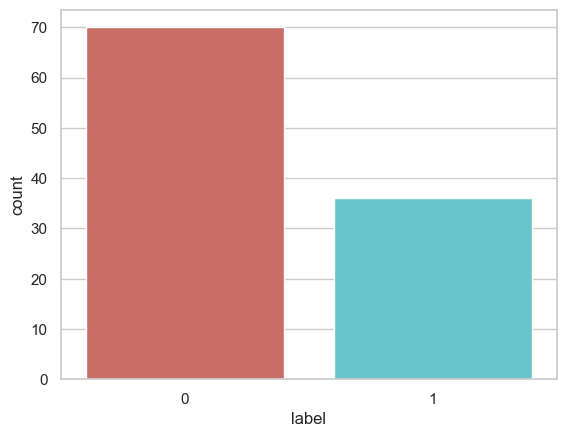

In [466]:
# visualize counts of those who won vs lost
sns.countplot(x='label', data=df, palette='hls')
plt.show()

In [467]:
# percentage of those who won vs lost
count_lost = len(df[df['label'] == 0])
count_won = len(df[df['label'] == 1])
pct_lost = round((count_lost/(count_lost + count_won)) * 100, 2)
pct_won = round((count_won/(count_lost + count_won)) * 100, 2)
print("Percentage that won: {0} %".format(pct_won));
print("Percentage that lost: {0} %".format(pct_lost));

Percentage that won: 33.96 %
Percentage that lost: 66.04 %


In [468]:
# check correlation between features and the outcome variable
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/admin/Documents/GitHub/csci6364/estimator/venv/lib/python3.7/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/admin/Documents/GitHub/csci6364/estimator/venv/lib/python3.7/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,label,Unnamed: 0,CycleCands,CycleIndivs,Amount,Female,Male,incumbent,AmountRank,AmountRankSimple
label,1.000000,0.282549,nan,nan,0.204680,0.348759,0.418835,0.615385,0.682660,-0.737248
Unnamed: 0,0.282549,1.000000,nan,nan,0.049682,0.217655,0.198805,0.510124,0.330710,-0.365309
CycleCands,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CycleIndivs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Amount,0.204680,0.049682,nan,nan,1.000000,0.458015,0.501173,0.143693,0.523796,-0.435632
Female,0.348759,0.217655,nan,nan,0.458015,1.000000,0.830562,0.369116,0.548775,-0.287633
Male,0.418835,0.198805,nan,nan,0.501173,0.830562,1.000000,0.282739,0.653146,-0.394233
incumbent,0.615385,0.510124,nan,nan,0.143693,0.369116,0.282739,1.000000,0.545907,-0.617364
AmountRank,0.682660,0.330710,nan,nan,0.523796,0.548775,0.653146,0.545907,1.000000,-0.835736
AmountRankSimple,-0.737248,-0.365309,nan,nan,-0.435632,-0.287633,-0.394233,-0.617364,-0.835736,1.000000


In [469]:
# logistic model using top three features
model_columns = ['AmountRankSimple']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns!='label'] , df['label'], test_size=0.25, random_state=16)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train[model_columns], y_train)

X_test = X_test[model_columns]
y_pred = logreg.predict(X_test[model_columns])

#view outliers and cases where the model was not correct
outlier_analysis = X_train
outlier_analysis['pred'] = logreg.predict(X_train[model_columns])

s = X_train[model_columns]
pb = logreg.predict_proba(s)
outlier_analysis[['pred_proba_0', 'pred_proba_1']] = pb
outlier_analysis['label'] = y_train
outlier_analysis['correct'] = np.where( (outlier_analysis['label']!=outlier_analysis['pred']), 0 , 1 )

In [470]:
outlier_analysis.to_csv('outliers.csv')

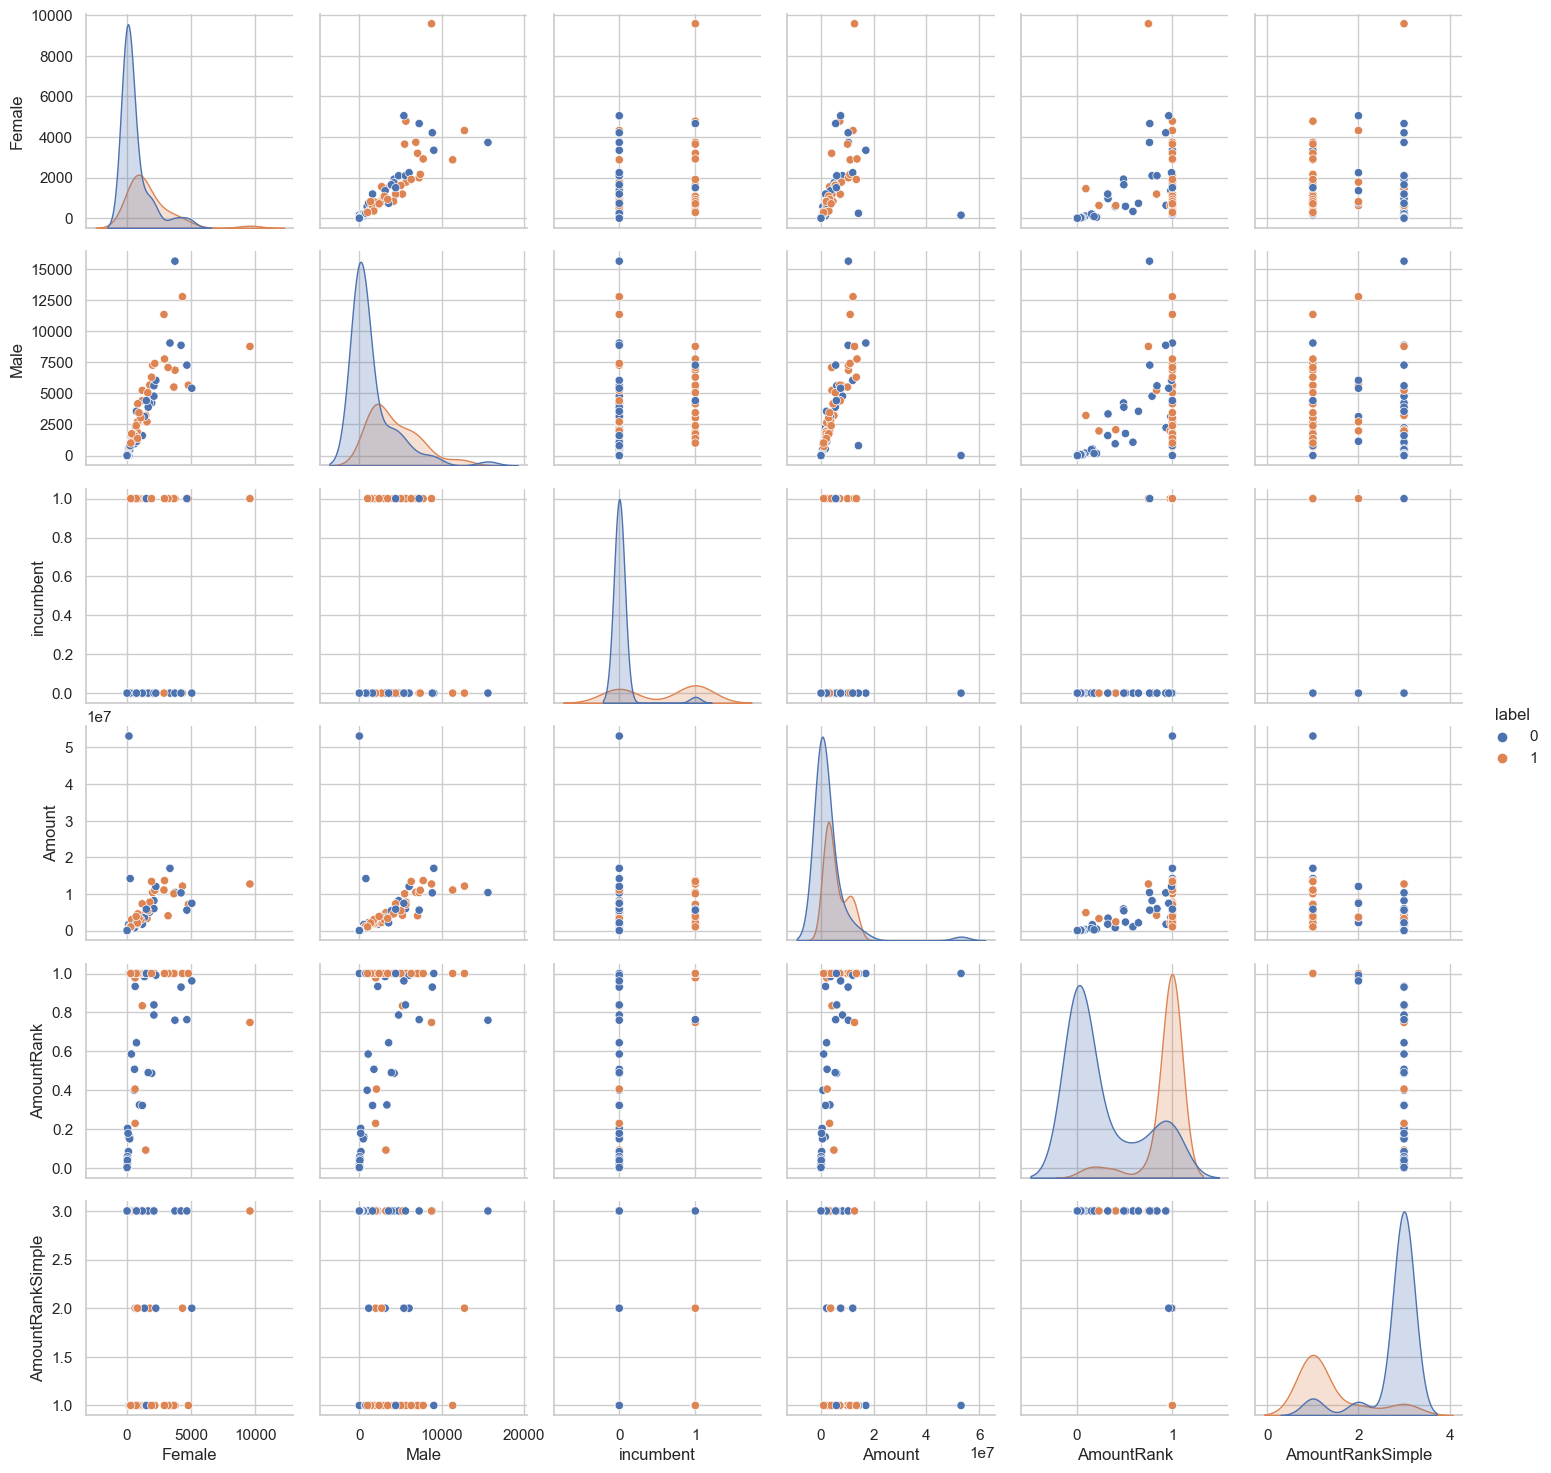

In [471]:
import seaborn as sns

#visuals
sns.pairplot(df[['label', 'Female', 'Male', 'incumbent', 'Amount', 'AmountRank', 'AmountRankSimple']], hue='label')

<AxesSubplot:xlabel='Amount', ylabel='label'>

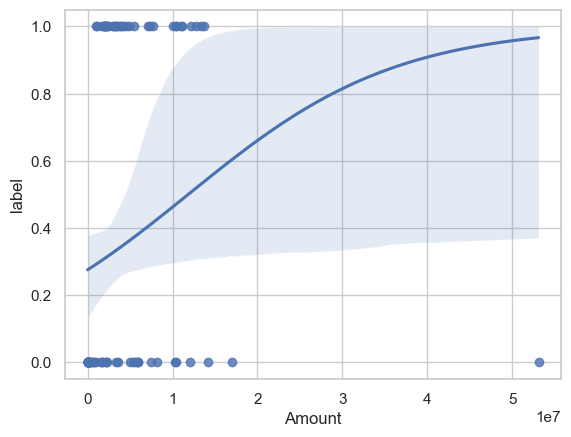

In [472]:

sns.regplot(df, x="Amount",y='label', logistic=True)

/Users/admin/Documents/GitHub/csci6364/estimator/venv/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<AxesSubplot:xlabel='AmountRank', ylabel='label'>

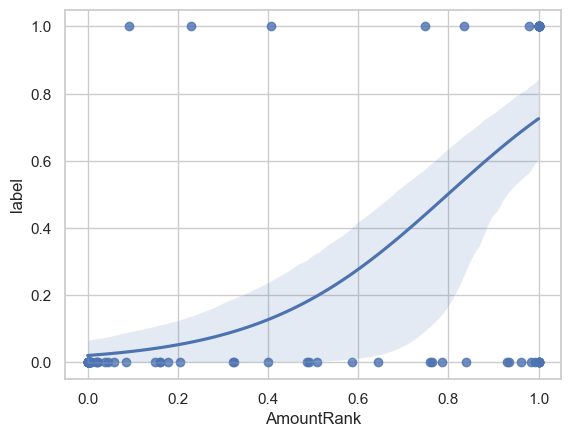

In [473]:

sns.regplot(df, x="AmountRank",y='label', logistic=True)

<AxesSubplot:xlabel='AmountRankSimple', ylabel='label'>

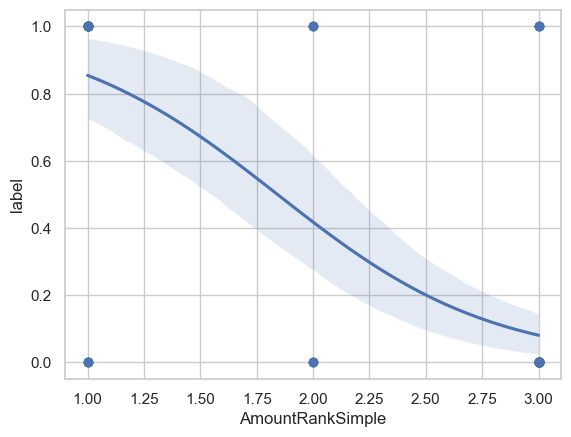

In [474]:
sns.regplot(df, x="AmountRankSimple",y='label', logistic=True)

In [475]:
# print model parameters
print('Intercept: \n', logreg.intercept_)
print('Coefficients: \n', logreg.coef_)

Intercept: 
 [3.15911945]
Coefficients: 
 [[-1.77284061]]


In [476]:
# odds ratio
np.exp(logreg.coef_)

array([[0.16984983]])

In [477]:
metrics.confusion_matrix(y_train, logreg.predict(X_train[model_columns]))


array([[49,  4],
       [ 7, 19]])

In [478]:
logreg.score(X_train[model_columns], y_train)

0.8607594936708861

In [479]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16,  1],
       [ 2,  8]])

Text(0.5, 427.9555555555555, 'Predicted label')

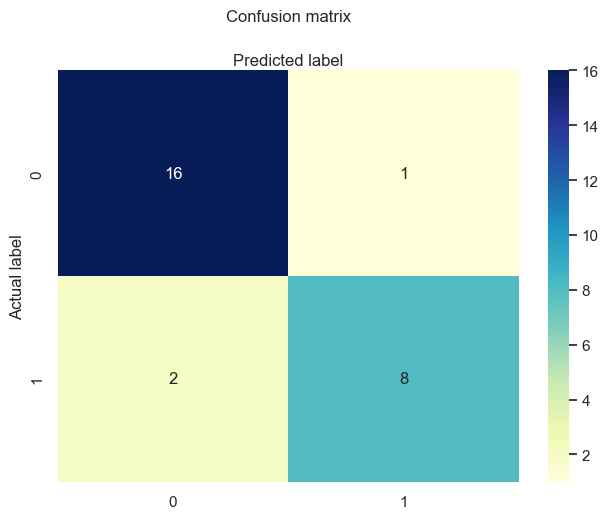

In [480]:
# visualize the confusion matrix with heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [481]:
# extract actual and predicted classes
actual = y_test
predicted = y_pred
classes = [0, 1]

# compute and print the confusion matrix
tn, fp, fn, tp = confusion_matrix(actual, predicted, labels=classes).ravel()
print("True Positives = {0}, False Positives = {1}, True Negatives = {2}, False Negatives = {3}".format(tp, fp, tn, fn));

# compute the sensitivity, specificity, precision, accuracy, f1 score
accuracy = round((tp+tn)/(tp+fp+tn+fn), 5) * 100;
sensitivity = round(tp/(tp+fn), 5) * 100;
specificity = round(tn/(tn+fp), 5) * 100;
f1_score = round((2*tp)/((2*tp)+fp+fn), 5) * 100;
precision = round(tp/(tp+fp), 5) * 100;

# print out the computed values
print("Accuracy: {0} %".format(accuracy));
print("Sensitivity: {0} %".format(sensitivity));
print("Specificity: {0} %".format(specificity));
print("Precision:{0} %".format(precision));
print("F1_Score:{0} %".format(f1_score));

True Positives = 8, False Positives = 1, True Negatives = 16, False Negatives = 2
Accuracy: 88.889 %
Sensitivity: 80.0 %
Specificity: 94.118 %
Precision:88.889 %
F1_Score:84.211 %
